# Homework 4
## Ryan Rudinger & Julia Jofe

In [1]:
# infamous imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import string

In [2]:
# read that file, doe
df = pd.read_csv("twitter_enviroed.csv")
df.head()

Date       Screen Name         Full Name  \
0  3/15/16    @_Lightscap3s_              Otis   
1  3/21/16    @_Lightscap3s_              Otis   
2   4/6/16  @_Lindsay_Conway           Lindsay   
3  3/23/16     @_mcisneros19  Mirella Cisneros   
4  3/23/16     @_mcisneros19  Mirella Cisneros   

                                          Tweet Text      Tweet ID  \
0  RT @NatureBridge: "NatureBridge is Highlight o...  7.100000e+17   
1  RT @NatureBridge: By 2050 we want more fish th...  7.120000e+17   
2  RT @savageducates: Greenest School on #Earth s...  7.180000e+17   
3  A1: For math children could measure trunks to ...  7.130000e+17   
4  A2: Going outside & letting children find the ...  7.130000e+17   

                  App  Followers  Follows  Retweets  Favorites Verfied  \
0           RoundTeam       2644    590.0         1          0      No   
1           RoundTeam       2641    587.0         2          0      No   
2  Twitter for iPhone        164    318.0         2          0      No   
3           TweetDeck          8     44.0         0          0      No   
4           TweetDeck          8     44.0         0          0      No   

  User Since              Location  \
0     6/8/09            Carmel, IN   
1     6/8/09            Carmel, IN   
2     6/7/14  Bratislava, Slovakia   
3     2/4/16                   NaN   
4     2/4/16                   NaN   

                                                 Bio Profile Image  
0  Artist @ Framed Lightscap3s LLC | Landscape, M...          View  
1  Artist @ Framed Lightscap3s LLC | Landscape, M...          View  
2  International education. SEN interests. Adopti...          View  
3                                                NaN          View  
4                                                NaN          View

What are your observations about how often the various apps (e.g., TweetDeck, Twitter for iPhone) are used to tweet? Show a visualization.

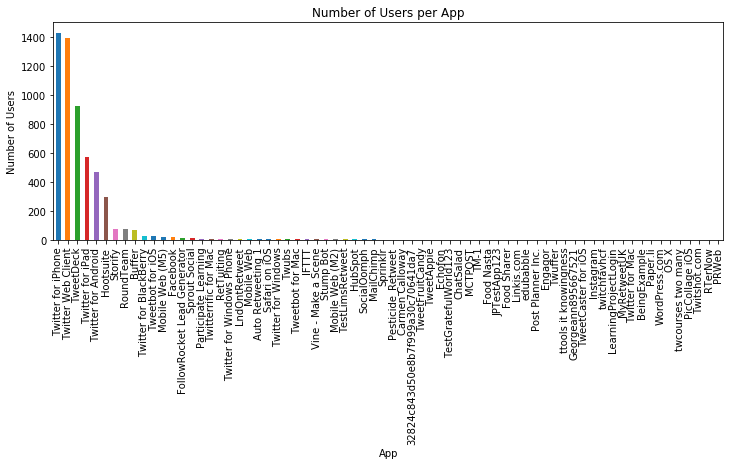

In [3]:
# Visualize
fig = plt.figure(figsize=(12,4))
df['App'].value_counts().plot(kind='bar')
plt.xlabel('App')
plt.ylabel('Number of Users')
plt.title('Number of Users per App')
plt.show()

Reflection: 

Only a few apps are really important. The most frequently used apps are Twitter for iPhone, Twitter Web Client, TweetDeck, Twitter for iPad, and Twitter for Android. An interesting observation is that while the top application is for iPhone users (typically seen as a Millenial and Gen Z product), the second application is Twitter Web Client, which is known for its popularity amongst older users because of its simpler interface. Another observation is that people are mainly using a combination of Apple softwares/products or operating from a Desktop before using Twitter on an Android.

What are your observations about how many original tweets there are compared to retweets (original contributions vs. amplification of others)? (Note that retweets start with the text RT and a username that starts with @.) Show a visualization.

In [4]:
tweets_df = df[['Screen Name','Tweet Text']]
rt_mask = []

for tweet in tweets_df['Tweet Text']:
    is_rt = tweet[:4] == 'RT @'
    rt_mask.append(is_rt)
retweets = tweets_df[rt_mask]
print('Visualization:\n\n', retweets)

Visualization:

            Screen Name                                         Tweet Text
0       @_Lightscap3s_  RT @NatureBridge: "NatureBridge is Highlight o...
1       @_Lightscap3s_  RT @NatureBridge: By 2050 we want more fish th...
2     @_Lindsay_Conway  RT @savageducates: Greenest School on #Earth s...
20           @_swatik_  RT @EnviroEducators: Interested in environment...
21            @_withah  RT @ItsAboutTimeEDU: Scientists mimic Mars soi...
22           @02Benson  RT @GreeningForward: Our CEO @COrgbon is still...
23         @109ThornKs  RT @RangerRidley: The Outdoors. The Ultimate #...
24         @1915Aurora  RT @JasonSohigian: Our new #GetRooted video ju...
25         @1915Aurora  RT @ArmeniaTree: Check out our new 9-minute #y...
26     @1GratefulWorld  RT @CNC90: K's and Gr.8's come together to tal...
27         @1stof7gens  RT @GEOEC: AB Climate Leadership with @RachelN...
28         @1stof7gens  RT @AlbertaEE: Student are producing a white p...
29       @2015_Projec

In [5]:
print('Retweets:',retweets.shape[0])
print('Originals:', df.shape[0] - retweets.shape[0])

Retweets: 2532
Originals: 2982


There are more original tweets than retweets, but they are still similar in number. This could mean this topic or hashtag #enviroEd is not super popular. Althogh there is a decent amount of original tweeting, there does not seem to be much engagement and spread with the original tweets. 

How often are there replies to tweets (showing interaction among people). Note that replies start with @username to show they are a reply to a specific user. Show a visualization.

In [6]:
replies_mask = []
for tweet in tweets_df['Tweet Text']:
    is_reply = tweet[0] == '@'
    replies_mask.append(is_reply)
replies = tweets_df[replies_mask]
replies.head()

Screen Name                                         Tweet Text
17     @_mcisneros19  @doctormorrison Today at my nature journaling ...
94   @academe_atl_hs  @TorontoWaldorf Looking great! Ours is coming ...
159  @Alexis_Curious  @RangerRidley @KinderKids123 "permission" can ...
160  @Alexis_Curious  @RangerRidley so tech seen as more rigid and l...
164      @aliceleung  @ChrisVella2 I just realized you're moderator....

In [7]:
print('Replies:', replies.shape[0])
print('Non-replies:', df.shape[0] - replies.shape[0])

Replies: 590
Non-replies: 4924


There are many more retweets and original tweets than reply tweets.

What are your observations about the distribution of followers counts (i.e., how many other users were following the poster of a given tweet)? Show a visualization. 

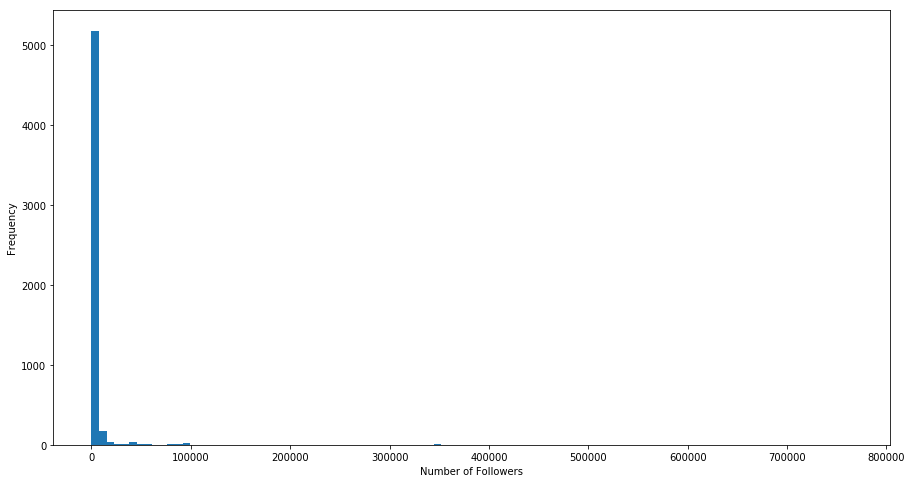

In [25]:
fig = plt.figure(figsize=(15,8))
plt.xlabel('Number of Followers')
df['Followers'].plot(kind='hist', bins=100)
plt.show()

The number of followers for this data is right skewed. There are very few individuals with extremely high follower counts, while more than 5,000 users in this data have up to 8,000 followers (Number of upper limit / 100 bins gives the interval width of each rectangle). This lays ground for justification that there could be a lack of influential people in this data.

What are your observations about the distribution of follows counts (i.e., how many other accounts are followed by the poster of a given tweet) and how does it compare to the distribution of followers counts? Show a visualization.

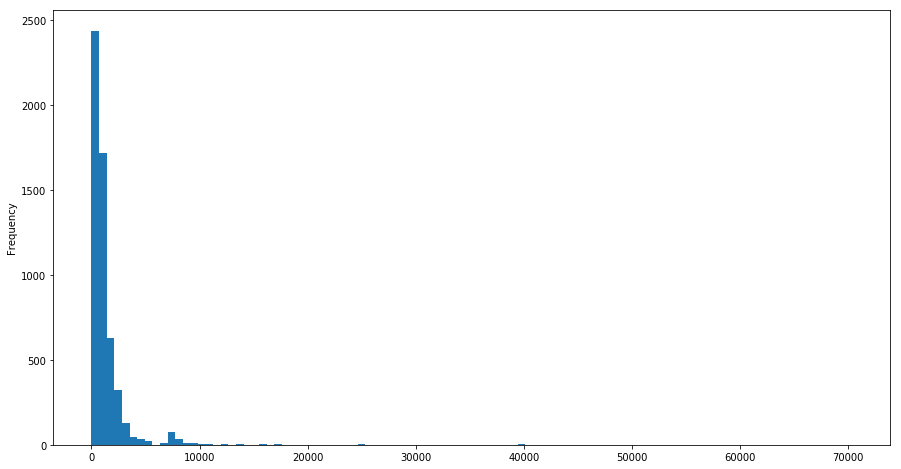

In [9]:
fig = plt.figure(figsize=(15,8))
df['Follows'].plot(kind='hist', bins=100)
plt.show()

The number of follows for this data is a little more spread out between 0 to 10000 follows, however the data is still very much right-skewed. This could lay the foundation for determining how significant a person's follow is worth. A person may have many out-connections, but not many coming in. In this case, the less follows one may give, the more specialized they may be in the topic. There is an extreme focus for their accounts. This data shows that the majority of the people in this data do not have too many follows, and their's has potential for more specificity in the surrounding subject.

Where are people tweeting? We don’t have complete or easily parsed location data unfortunately. For a quick analysis, we can use the Location column, which is populated based on whatever a given user added in their profile on Twitter, although this may be blank or contain unhelpful information. Make two graphs showing the top 25 locations, one based on number of tweets sent from that location, and one based on number of users from that location.

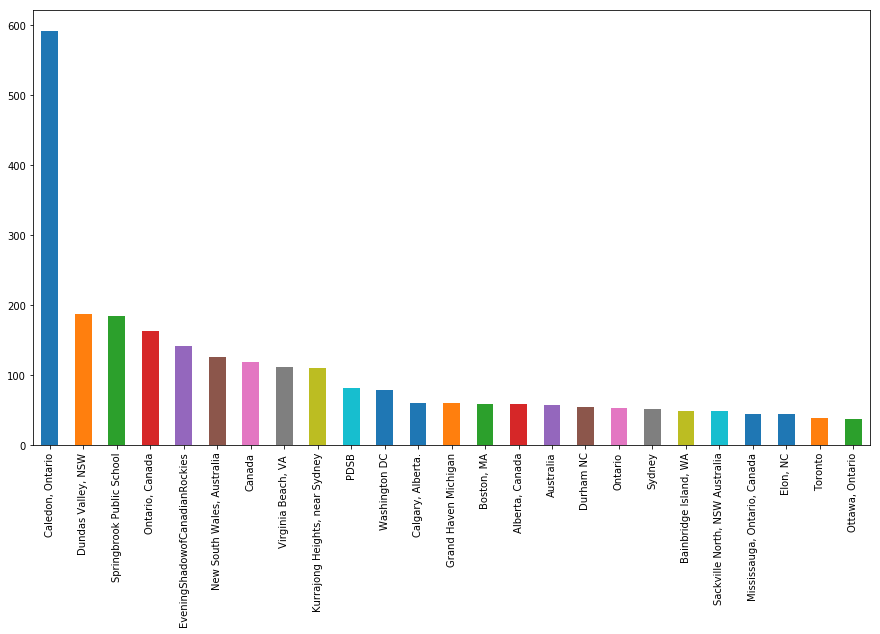

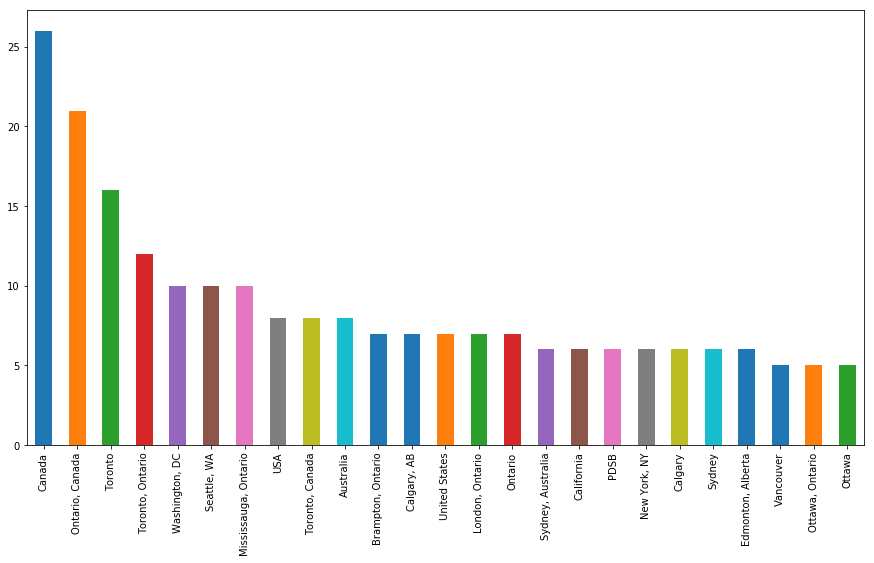

In [10]:
loc_data = df['Location'].value_counts()[:25]
fig = plt.figure(figsize=(15,8))
loc_data.plot(kind='bar')
plt.show()
loc_data_w_unique_people = df.drop_duplicates('Screen Name', keep='last')['Location'].value_counts()[:25]
fig = plt.figure(figsize=(15,8))
loc_data_w_unique_people.plot(kind='bar')
plt.show()

When are people tweeting? Discuss your observations of when people tweet by analyzing the date column. Make a graph showing the number of tweets sent for each day of the week (Monday through Sunday). You may need to Google a bit for help with working with dates.

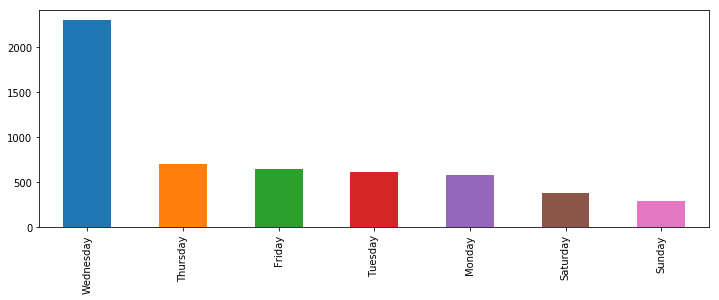

In [11]:
from datetime import date
data_array = df.values
days = []
for row in data_array:
    split = row[0].split('/')
    year = 0
    month = 0
    day = 0
    for i in range(len(split)):
        if i == 0:
            month = int(split[i])
        elif i == 1:
            day = int(split[i])
        else:
            year = int('20' + split[i])
        
    obj = date(year, month, day)    
    days.append(obj.strftime('%A'))
df_days = pd.DataFrame(days)
fig = plt.figure(figsize=(12,4))
df_days[0].value_counts().plot(kind='bar')
plt.show()

What are people tweeting? Discuss your observations of the content of the tweets, based on the Tweet Text column. Make two graphs, one showing the top 50 most common words used in tweets, and one showing the top 20 most common topics (words starting with #).

In [12]:
data_array = df.values
word_list = []
for row in data_array:
    split = row[3].split(' ')
    for word in split:
        word_list.append(word)    

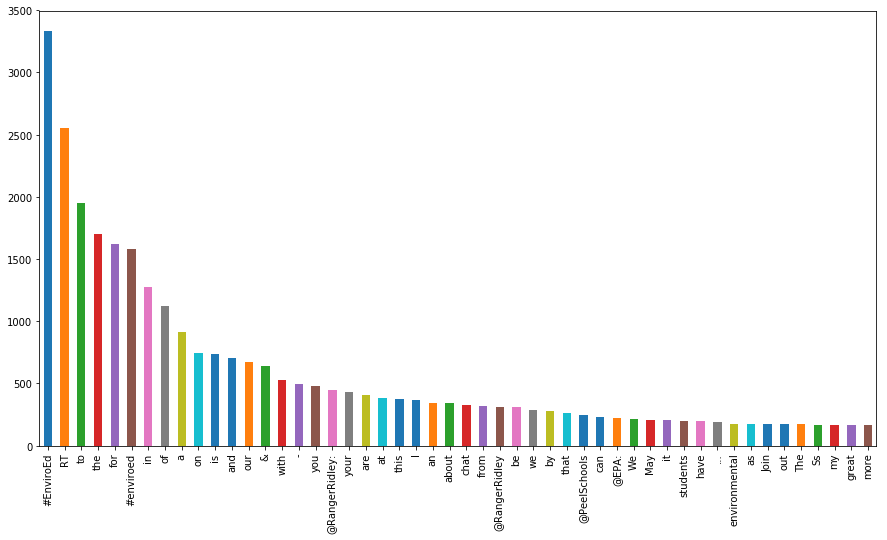

In [13]:
# Most common words (stopwords included)
tweet_words = pd.DataFrame(word_list)
fig = plt.figure(figsize=(15,8))
tweet_words[0].value_counts()[:50].plot(kind='bar')
plt.show()

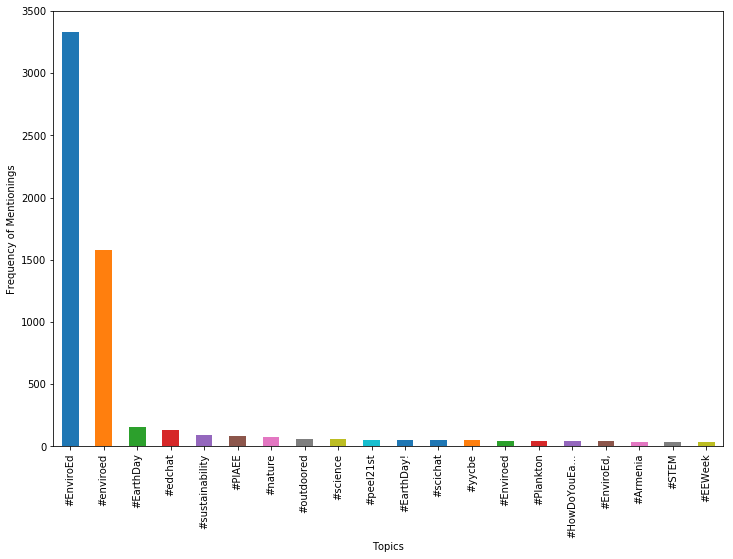

In [14]:
# most common topics
topic_list = []
for word in tweet_words[0]:
    if word.startswith('#'):
        topic_list.append(word)
topic_df = pd.DataFrame(topic_list)
fig = plt.figure(figsize=(12,8))
topic_df[0].value_counts()[:20].plot(kind='bar')
plt.xlabel('Topics')
plt.ylabel('Frequency of Mentionings')
plt.show()

##### i. Who is tweeting?

i. Create a directed, weighted, social network graph where the nodes are the unique twitter users, the edges indicate if a user has mentioned another user in a tweet, and the weights are a count of how many times the user was mentioned. (Note that edges should be directed from the mentioning user to the mentioned user.) [The day 17 tutorial may be helpful here.]

In [15]:
G = nx.DiGraph()

# get unique twitter users, add to Graph obj
nodes = set(df['Screen Name'])
G.add_nodes_from(nodes)

In [16]:
edges = {}
t_array = df.values

for record in t_array:
    mentioner = record[1]
    indiv_words = record[3].split()
    mentioned = []
    for word in indiv_words:
        if word.startswith('@'):
            word = word.rstrip(string.punctuation)
            # There are some @ symbols that only have other punctuation attached, and end up as blank lines. Removing these from list
            # Ex: @..., I am unsure if the ... is continued in the whole Tweet Text column, or if it were trimmed to fit,
            # but these examples will be removed
            if len(word) > 0:
                mentioned.append(word)
    for person in mentioned:
        key = (mentioner, person)
        if key in edges:
            edges[key] += 1
        else:
            edges[key] = 1


In [17]:
# add edge to graph with determined weights
for (k, v) in edges.items():
    print(k ,':', v)
    G.add_edge(*k, weight=v)

('@_Lightscap3s_', '@NatureBridge') : 2
('@_Lightscap3s_', '@5gyres') : 1
('@_Lindsay_Conway', '@savageducates') : 1
('@_mcisneros19', '@doctormorrison') : 1
('@_mcisneros19', '@sgilley12') : 1
('@_mcisneros19', '@DannyBavis') : 1
('@_mcisneros19', '@amk_elon') : 1
('@_mcisneros19', '@paigebl213') : 1
('@_swatik_', '@EnviroEducators') : 1
('@_swatik_', '@JackSmytheFC') : 1
('@_withah', '@ItsAboutTimeEDU') : 1
('@02Benson', '@GreeningForward') : 1
('@02Benson', '@COrgbon') : 1
('@109ThornKs', '@RangerRidley') : 1
('@1915Aurora', '@JasonSohigian') : 1
('@1915Aurora', '@ArmeniaTree') : 2
('@1915Aurora', '@CivilNetTV') : 1
('@1GratefulWorld', '@CNC90') : 1
('@1GratefulWorld', '@fatim_to') : 1
('@1GratefulWorld', '@MrsEimers') : 1
('@1GratefulWorld', '@OLVPrincipal') : 1
('@1stof7gens', '@GEOEC') : 1
('@1stof7gens', '@RachelNotley') : 1
('@1stof7gens', '@AlbertaEE') : 2
('@1stof7gens', '@cgeducation') : 1
('@1stof7gens', '@1stof7gens') : 1
('@2015_Project', '@ArmeniaTree') : 1
('@2015_Proje

('@CalSpillWatch', '@CA_Pesticides') : 1
('@CambridgeEngZa', '@AlistairWhitby') : 1
('@cameroma', '@GEOEC') : 1
('@cameroma', '@cleanshorelines') : 1
('@cameroma', '@vanaqua') : 1
('@CampKawartha', '@EnviroEducators') : 2
('@CampKawartha', '@CKEnvCentre') : 2
('@CampKawartha', '@NaturesYear') : 1
('@CampKawartha', '@kawarthaNOW') : 1
('@CampKawartha', '@davidsuzukiqog') : 1
('@campSTEM', '@MfentonFenton') : 1
('@campSTEM', '@campSTEM') : 1
('@campSTEM', '@OmahaZoo') : 1
('@CanadaGreenJobs', '@CaGBC') : 1
('@CanadaGreenJobs', '@TBG_Canada') : 1
('@CanadaGreenJobs', '@BTCEA') : 1
('@CanadaGreenJobs', '@Sierra_BC') : 1
('@CanadaRenewable', '@Pembina') : 1
('@CanadaRenewable', '@AlbertaEE') : 1
('@CanadaRenewable', '@GEF140') : 1
('@CanadianFishn', '@CWF_FCF') : 1
('@CanGeoEdu', '@EnviroEducators') : 2
('@CanGeoEdu', '@CKEnvCentre') : 1
('@CanGeoEdu', '@JackSmytheFC') : 1
('@capn_madd_katt', '@ELKissner') : 1
('@CapobiaNB', '@AAPremlall') : 2
('@CaraClimpsonLee', '@BigHistoryPro') : 1
('@C

('@deni_nancy', '@CWF_FCF') : 1
('@DenisonJudi', '@RangerRidley') : 1
('@DenisonJudi', '@PeelSchools') : 1
('@DeronBilous', '@GEOEC') : 1
('@DeronBilous', '@RachelNotley') : 1
('@DeronBilous', '@AlbertaEE') : 1
('@DeronBilous', '@cgeducation') : 1
('@DFLinton', '@RangerRidley') : 1
('@DFWM_MONTREAL', '@RangerRidley') : 1
('@DFWM_MONTREAL', '@CWF_FCF') : 1
('@DianeN56', '@PlanktonPundit') : 1
('@DibellinDiane', '@MHEducation') : 1
('@digitalcloudgal', '@eIncBoston') : 1
('@digitalcloudgal', '@burts…') : 1
('@digitalperiod', '@NAAEEStaff') : 1
('@director_fv', '@EPA') : 1
('@DiveNag', '@PlanktonPundit') : 1
('@DiversityInApps', '@OpenEbks') : 1
('@dkemball', '@EnviroEducators') : 3
('@dkemball', '@CKEnvCentre') : 2
('@dkemball', '@JackSmytheFC') : 1
('@DLitowski', '@KinderFynes') : 1
('@DMashak', '@selfgovwest') : 1
('@doccarpenter', '@doctormorrison') : 1
('@doctormorrison', '@ClaireHWarden') : 1
('@doctormorrison', '@CreativeSTAR') : 1
('@doctormorrison', '@amycoyote') : 2
('@doctormor

('@enertweets', '@enertweets') : 1
('@enickers', '@StuartCDSchool') : 1
('@enickers', '@PhillyBugMuseum') : 1
('@envir490', '@pie_saster') : 1
('@envirochap_d', '@Sierra_BC') : 1
('@envirochelle', '@sshellery') : 1
('@envirochelle', '@envirochelle') : 1
('@envirochelle', '@STEMTeachTools') : 1
('@EnviroEducators', '@CKEnvCentre') : 5
('@EnviroEducators', '@RangerRidley') : 6
('@EnviroEducators', '@EarthDayCanada') : 1
('@EnviroEducators', '@EnviroEducators') : 7
('@EnviroEducators', '@LSF_LST') : 1
('@EnviroEducators', '@DavidSuzukiFDN') : 3
('@EnviroEducators', '@ON_EcoSchools') : 1
('@EnviroEducators', '@NWF') : 1
('@EnviroEducators', '@SustyQ') : 1
('@EnviroEducators', '@DrScottSampson') : 1
('@EnviroEducators', '@RichLouv') : 1
('@EnviroEducators', '@actionbonnie') : 1
('@EnviroEducators', '@2LisaMayer') : 3
('@EnviroEducators', '@FreeSeedsTO') : 1
('@EnviroEducators', '@JackSmytheFC') : 10
('@EnviroEducators', '@environmentont') : 1
('@EnviroEducators', '@PaulKelba') : 1
('@Enviro

('@GrantonGranton', '@RichardMcLellan') : 1
('@GRC_News', '@EPA') : 1
('@green_ombudsman', '@EPA') : 1
('@GreenAcorns', '@ELKissner') : 1
('@GreeningDetroit', '@NAAEEStaff') : 1
('@GreeningForward', "@edXOnline's") : 1
('@GreeningForward', '@COrgbon') : 1
('@GreeningForward', '@GrowtoLearnNYC') : 1
('@GreeningTheMLB', '@GlobalGreen') : 1
('@GreenLearning', '@ODIdev') : 1
('@GreenLearning', '@Kimberly_Gray') : 1
('@Greennomad73', '@GlobalEE2016') : 1
('@GreenSchoolsNN', '@EDGreenRibbon') : 1
('@greenseattle', '@IslandWood') : 1
('@greenseattle', '@KevinRanker') : 1
('@greensquad14', '@OCSBeco') : 1
('@greensquad14', '@greensquad14') : 1
('@greenVCC', '@CanadaGreenJobs') : 1
('@Greg_P_Nichols', '@EPA') : 1
('@Grim_Law', '@EPA') : 1
('@grnmn1', '@RangerRidley') : 1
('@groundworkpdx', '@IslandWood') : 1
('@GrouperDoc', '@PlanktonPundit') : 1
('@GrsoukupGreg', '@EPA') : 1
('@grumblesthacook', '@AAPremlall') : 1
('@GUC_Info', '@EPA') : 1
('@GuidaMicael', '@CNC90') : 1
('@GuidaMicael', '@fati

('@learnPSNSW', '@ChrisVella2') : 1
('@learnPSNSW', '@stevenbody') : 1
('@ledwards_l', '@ItsAboutTimeEDU') : 1
('@leila_wills', '@RangerRidley') : 1
('@LemireMichelle', '@BeWildON') : 1
('@LemireMichelle', '@cpaws') : 1
('@Lemurprincess', '@EPA') : 1
('@Lesesky', '@BigHistoryPro') : 1
('@leslie_edu', '@KinderKids123') : 1
('@leslie_edu', '@DavidSuzukiSS') : 2
('@leslie_edu', '@Mr_Crozier') : 1
('@leslie_edu', '@PeelSchools') : 1
('@leslie_edu', '@PD…') : 1
('@LfSScotland', '@eerjournal') : 1
('@lhendersonsmall', '@RangerRidley') : 1
('@LHuffling', '@HCarlone') : 3
('@LHuffling', '@GaStateParks') : 1
('@LHuffling', '@cematthe') : 2
('@LHuffling', '@m_h_allen') : 2
('@LHuffling', '@NSTA') : 1
('@LHuffling', '@RangerRidley') : 1
('@Libramlad', '@DavidSpencerEdu') : 1
('@LifeGreenGroup', '@BotSocSA') : 1
('@LifeGreenGroup', '@KirstenboschNBG') : 1
('@linda_santilli', '@DSSSEcoAction') : 1
('@linda_santilli', '@leslie_edu') : 1
('@linda_santilli', '@DSSSguidance') : 1
('@LindaBouzanis', '@O

('@MVChertan', '@PlanktonPundit') : 1
('@MWMScience', '@OfficialNGSS') : 1
('@MyTownTutorsMA', '@MHEducation') : 1
('@MzMozer', '@ycedillo94') : 3
('@MzMozer', '@exploreorg') : 1
('@MzMozer', '@PaulKelba') : 2
('@MzMozer', '@CurrenCougars') : 1
('@MzMozer', '@SustyQ') : 1
('@MzMozer', '@RangerRidley') : 2
('@NAAEEStaff', '@PaulKelba') : 1
('@NAAEEStaff', '@CBFieldStation') : 1
('@NAAEEStaff', '@MAEOE_MD') : 1
('@NAAEEStaff', '@Mason4C') : 1
('@NAAEEStaff', '@saracole') : 1
('@NAAEEStaff', '@NAAEESt…') : 1
('@NAAEEStaff', '@bijakids') : 1
('@NAAEEStaff', '@jenkatwork') : 1
('@NAAEEStaff', '@NAAEEStaff') : 4
('@NAAEEStaff', '@yesmagazine') : 1
('@NAAEEStaff', '@EECapacity') : 5
('@NAAEEStaff', '@KnowltonCockett') : 1
('@NAAEEStaff', '@AlbertaEE') : 1
('@NAAEEStaff', '@GoodmanCenter') : 1
('@NAAEEStaff', '@gambassa') : 1
('@NAAEEStaff', '@IslandWood') : 1
('@NAAEEStaff', '@antiochseattle') : 1
('@NAAEEStaff', '@Interior') : 1
('@NAAEEStaff', '@philanthropynw') : 1
('@NAAEEStaff', '@EPA') 

('@RangerRidley', '@ELKissner') : 5
('@RangerRidley', '@envirojer') : 7
('@RangerRidley', '@JamesPotterPS') : 1
('@RangerRidley', '@_mcisneros19') : 3
('@RangerRidley', '@MrsEimers') : 2
('@RangerRidley', '@techdde') : 2
('@RangerRidley', '@MrsNeal0') : 1
('@RangerRidley', '@TDSB_mendoza') : 1
('@RangerRidley', '@googlemaps') : 1
('@RangerRidley', '@TBG_Canada') : 1
('@RangerRidley', '@cherandpete') : 1
('@RangerRidley', '@NaturlCuriosity') : 1
('@RangerRidley', '@journeynorthED') : 2
('@RangerRidley', '@Rang…') : 1
('@RangerRidley', '@Mr_Crozier') : 6
('@RangerRidley', '@MirandaRHK') : 1
('@RangerRidley', '@TashasOwn') : 1
('@RangerRidley', '@Adrian_T_Graham') : 1
('@RangerRidley', '@MrSoclassroom') : 1
('@RangerRidley', '@ibelongoutdoors') : 1
('@RangerRidley', '@EPAregion2') : 1
('@RangerRidley', '@biolitestove') : 1
('@RangerRidley', '@EcoSchoolsTDSB') : 1
('@RangerRidley', '@PDSB_eco') : 3
('@RangerRidley', '@EarthDayCanada') : 2
('@RangerRidley', '@ChrisVella2') : 18
('@RangerRid

('@TRCA_Edu', '@PEYAlliance') : 1
('@TRCA_Edu', '@TRCA_Edu') : 1
('@TRCA_Edu', '@PeelSchools') : 1
('@trembathkindie', '@CreativeSTAR') : 1
('@TrentUSoE', '@EnviroEducators') : 1
('@TrillmaticRT', '@eerjournal') : 1
('@Trish_ll', '@RangerRidley') : 1
('@Trish_ll', '@EnviroEducators') : 2
('@TruDavidJackson', '@RangerRidley') : 1
('@TSMScouncil', '@EnviroEducators') : 1
('@TSMScouncil', '@CKEnvCentre') : 1
('@TTHDragons', '@EPA') : 1
('@TurnerCreekES', '@NorthCarolinaEE') : 1
('@TurnerCreekES', '@NCReserve') : 1
('@TurnerCreekES', '@TurnerCreekES') : 1
('@TurnerCreekES', '@WCPSS') : 1
('@twitturriculum', '@BigHistoryPro') : 1
('@txbutterfly380', '@EPA') : 1
('@UCDSB', '@EnviroEducators') : 1
('@UCDSB', '@CKEnvCentre') : 1
('@UF_IFAS', '@Pinellas_Ext_NR') : 1
('@UF_IFAS', '@UF_IFAS') : 1
('@UF_IFAS', '@CHNEP') : 1
('@UMKCLaw', '@DELawSchool') : 1
('@UMKCLaw', '@UMKCLaw') : 1
('@unarose7', '@RangerRidley') : 1
('@unarose7', '@CWF_FCF') : 1
('@Unitingschools', '@willjohnst') : 1
('@UOITGoG

1. Update: for simplicity, only include mentions of users who are in the list of nodes. This way you can set up a nested for-loop where the outer for-loop iterates over all the tweets, and the inner for-loop iterates over all the users to see if they’re mentioned.


Woops! Did the previous before looking at the update

ii. Show the graph info (nodes, edges, average in- and out-degree) and network density. You should have around 3,000 edges.

In [18]:
print(nx.info(G))
print('\nNetwork Density\n',nx.density(G))

Name: 
Type: DiGraph
Number of nodes: 2090
Number of edges: 3886
Average in degree:   1.8593
Average out degree:   1.8593

Network Density
 0.0008900575124656151


iii. [Note that this step will be slow.] Calculate in-degree, out-degree, betweenness centrality, closeness centrality, and eigenvector centrality. Update each node in the graph with its values for these measures, similarly to how we did this in lab 13. 

In [19]:
in_dict = dict(nx.in_degree_centrality(G)) 
out_dict = dict(nx.out_degree_centrality(G))
between_dict = dict(nx.betweenness_centrality(G))
close_dict = dict(nx.closeness_centrality(G))
eigen_dict = dict(nx.eigenvector_centrality(G))

In [20]:
nx.set_node_attributes(G, in_dict, 'in_degree')
nx.set_node_attributes(G, out_dict, 'out_degree')
nx.set_node_attributes(G, between_dict, 'between')
nx.set_node_attributes(G, close_dict, 'close')
nx.set_node_attributes(G, eigen_dict, 'eigen')

iv. Print out the top 20 users (nodes) ranked by each of the following metrics: in-degree, out-degree, betweenness centrality, and eigenvector centrality.

In [21]:
from operator import itemgetter
sorted_in = sorted(in_dict.items(), key=itemgetter(1),
reverse=True)
sorted_out = sorted(out_dict.items(), key=itemgetter(1),
reverse=True)
sorted_betweenness = sorted(between_dict.items(), key=itemgetter(1),
reverse=True)
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1),
reverse=True)


print("\nTop 20 nodes by in-degree centrality:\n") 
for b in sorted_in[:20]:
    print(b)
print("\nTop 20 nodes by out-degree centrality:\n") 
for b in sorted_out[:20]:
    print(b)
print("\nTop 20 nodes by betweenness centrality:\n")
for b in sorted_betweenness[:20]:
    print(b)
print("\nTop 20 nodes by eigenvector centrality:\n")
for b in sorted_eigen[:20]:
    print(b)


Top 20 nodes by in-degree centrality:

('@RangerRidley', 0.11680229775011967)
('@EPA', 0.07228338918142652)
('@PeelSchools', 0.041646720919100044)
('@EnviroEducators', 0.03350885591191958)
('@PaulKelba', 0.028721876495931067)
('@KinderKids123', 0.02584968884633796)
('@CWF_FCF', 0.022977501196744854)
('@IslandWood', 0.0215414073719483)
('@JackSmytheFC', 0.02106270943034945)
('@PDSB_eco', 0.020105313547151747)
('@ChrisVella2', 0.019626615605552896)
('@NAAEEStaff', 0.019147917663954045)
('@stevenbody', 0.018669219722355194)
('@MindShiftKQED', 0.018190521780756343)
('@KinderFynes', 0.018190521780756343)
('@Sierra_BC', 0.01771182383915749)
('@EZECNSW', 0.01771182383915749)
('@CreativeSTAR', 0.01723312589755864)
('@ON_EcoSchools', 0.01675442795595979)
('@PlanktonPundit', 0.01675442795595979)

Top 20 nodes by out-degree centrality:

('@RangerRidley', 0.06893250359023456)
('@ChrisVella2', 0.03207276208712302)
('@PaulKelba', 0.028243178554332216)
('@DavidSpencerEdu', 0.028243178554332216)
('@L

v. In a markdown cell, discuss your observations of these 4 lists.

In the grand scheme of things, these numbers are super small! However, if we consider the total number of possible edges, 2090 * 2089 = 4366010, the actual number of edges is less than 1/1000th of the whole. The real density of G is 0.0008900575124656151.


Let's take a look at @RangerRidley! If you look this man up, you will find he has many roles in environmental education:

1. Coordinator, Peel District School Board's Outdoor Ed Centres
2. Speaker on Value & Practices of 21st Century #OutdoorEd.
3. Moderator of #EnviroEd chat Wed 9-10 EST

His roles, influence, and connection is very much seen throughout the above data! Mr. Ridley is the most well-connected to other well-connected #enviroEd humans. He is almost in contact with 50% of the more influential enviro-ed figures on Twitter (at least within 3/18/16 and 5/31/16).

Ridley also has a diverse range of contacts. Although he is only approximately 6% between (within the shortest path) all the nodes, it shows that even those people who do not use Twitter that frequently, or tweet often about enviro-ed usually, go to and mention/contact Ridley the most. 

Ridley also tweeted the most within the given time interval with a 6.9% out-degree centrality measure. This would probably mean he was actively on Twitter. This would mean out of the total number of tweets about this topic (3886), he sent approximately 7% of these, or around 267 tweets.

He was also referenced the most by other people who mentioned @enviroEd with a 12% in-degree centrality.

vi. Pick three Twitter users (nodes) for further exploration. Make a graph visualization for each of the user’s subgraphs by using http://hdlab.stanford.edu/palladio/, similar to lab 12. Save screenshots to be turned in.

This shows the three top Twitter users in this data from the eigenvector centrality metric and the number of followers that they have.

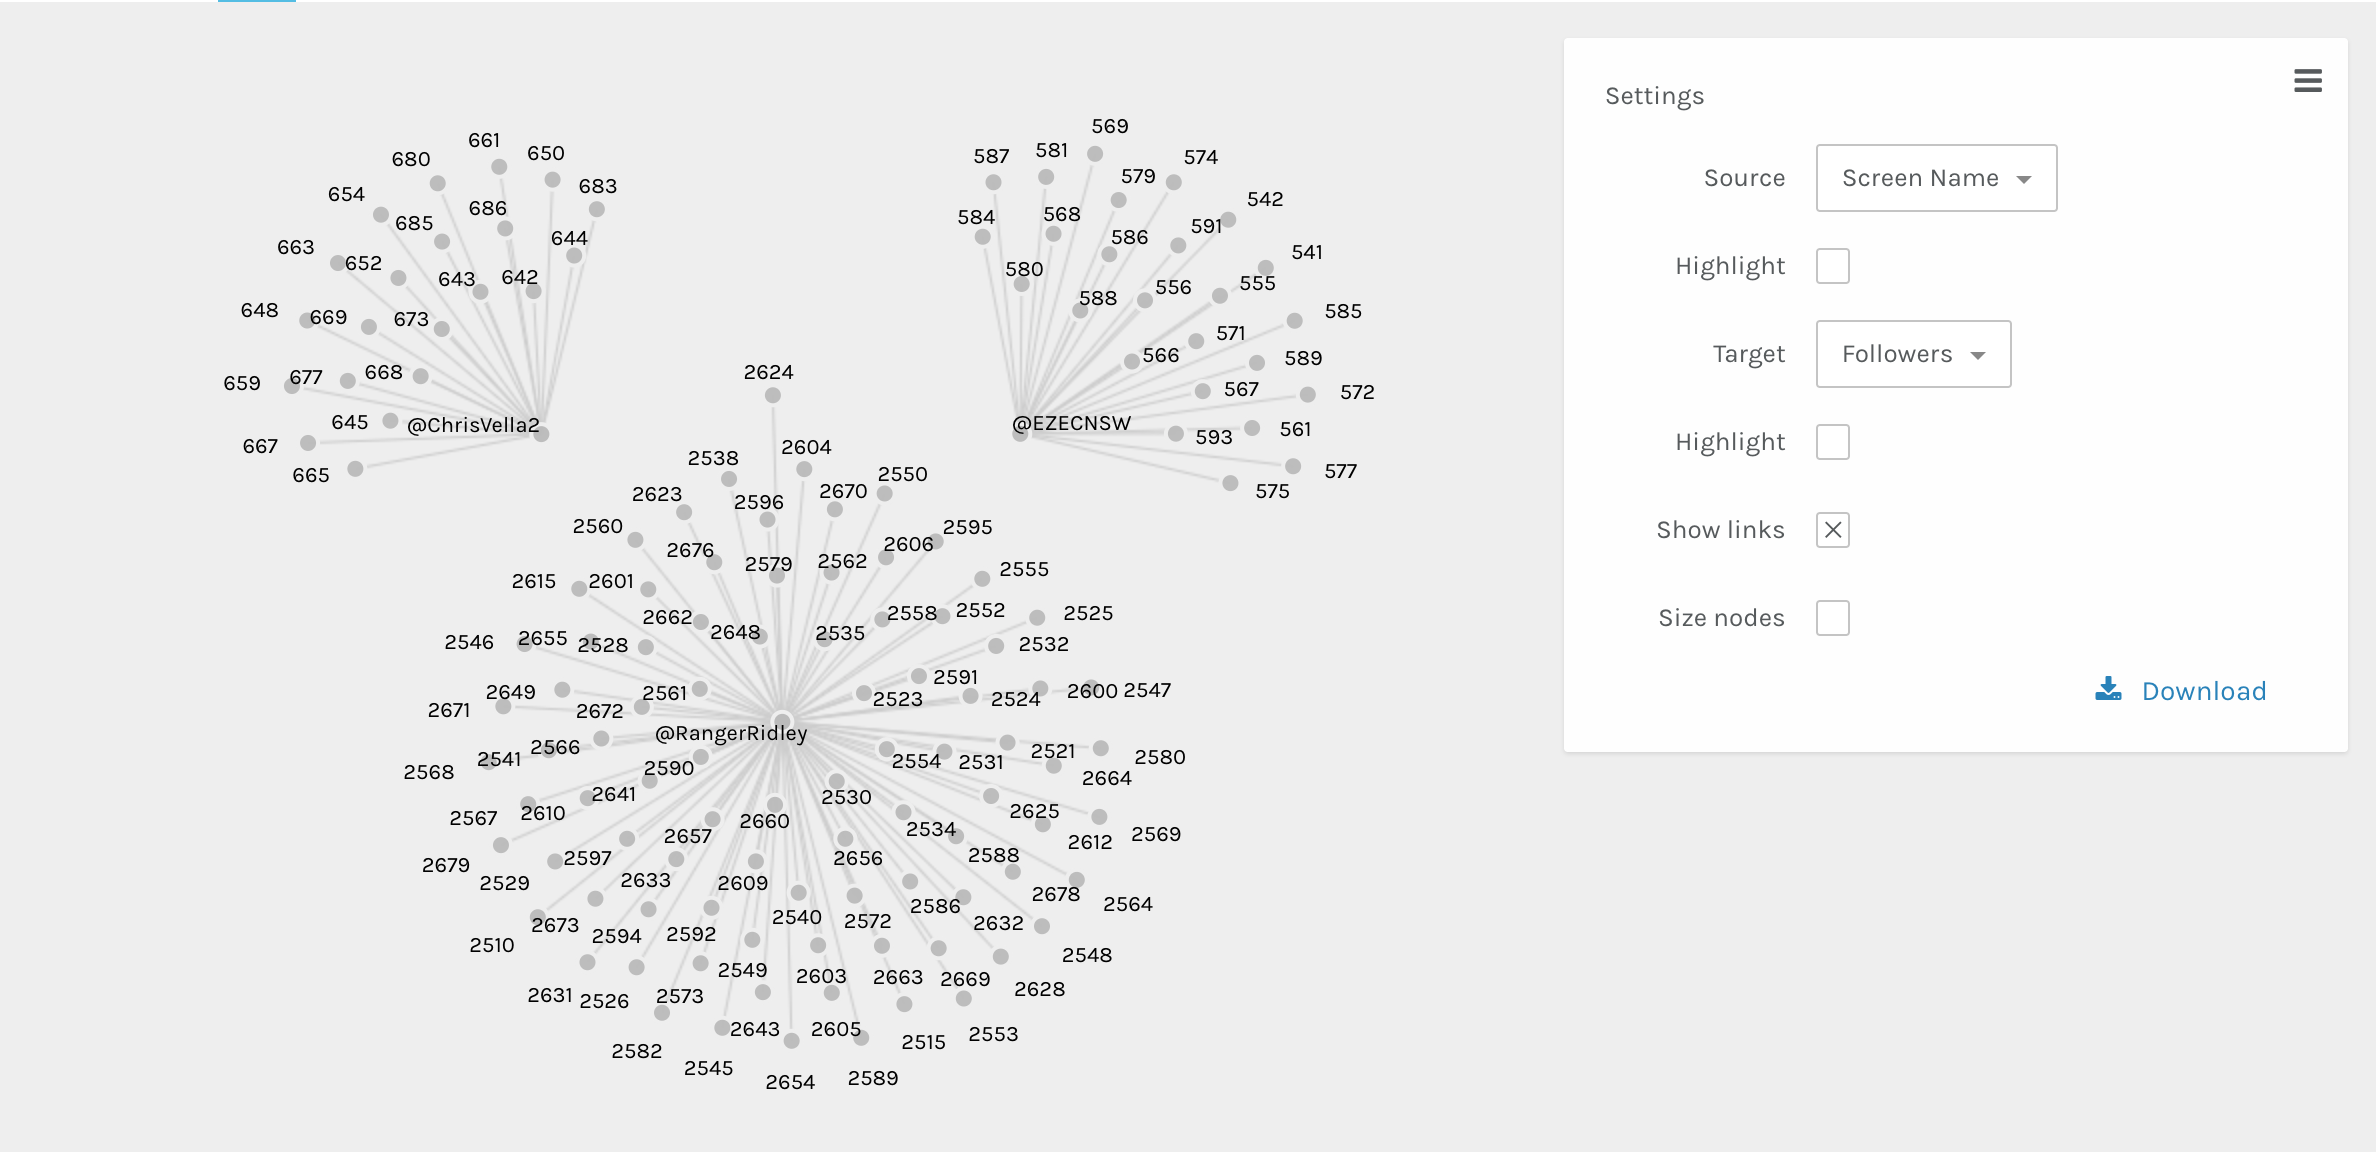

In [22]:
from IPython.display import Image
Image(filename = 'subgraphs.png')

vii. In a markdown cell, discuss three users you selected in terms of their graphs and assorted calculated metrics.

This graph represents the change in follower count for these three Twitter users with respect to time. Each node represents a moment where their follower count changed. The fact that @RangerRidley has more nodes means that at the time of each of his tweets, his number of followers has increased since the last. This may suggest that his visability and popularity is growing. 

##### j.  Pose an additional question or area of interest about this dataset, write code to answer it, show a visualization, and discuss your observations.

Is there a correlation between how many followers a user (potentially the creation of user's account) has and if the user is verified?

In [23]:
# Get most recent followers for each user
df = df.sort_values('Date')
df_new = df[['Screen Name', 'Followers', 'Verfied']]
df_new = df_new.drop_duplicates('Screen Name', keep='last')
df_new = pd.get_dummies(df_new, columns=['Verfied'])
df_new = df_new.sort_values('Followers', ascending=False)
df_new

Screen Name  Followers  Verfied_No
1342         @edutopia     765634           1
1969      @girlshealth     587453           1
1596              @EPA     355308           1
3112    @MindShiftKQED     178761           1
1272  @EarthVitalSigns     165337           1
2180    @IsraelNewsNow     123580           1
4738         @Seasaver     120336           1
3858      @PeelSchools      93204           1
1162          @DMashak      90666           1
5484      @YosemiteNPS      85112           1
1643      @EPAresearch      84680           1
4600           @Revkin      72711           1
3153     @Moonbattery1      66687           1
613    @ChildrenNature      57680           1
3985     @RachelNotley      57213           1
939           @CWF_FCF      46467           1
5058  @Sustainablehero      46163           1
3535             @NSTA      39087           1
1441        @elemenous      36817           1
1600     @EPAgreenbldg      36219           1
1824      @femaregion2      31565           1
4702   @sarahdateechur      30793           1
3324  @museumofscience      29407           1
391     @BigHistoryPro      29256           1
2742       @Law1Gloria      28943           1
3967   @ProjectPeachUK      28275           1
3066      @MHEducation      26872           1
2265   @Jackthelad1947      23040           1
3029    @McGrawHillK12      22861           1
2262   @jackiegerstein      22311           1
...                ...        ...         ...
4816          @SKassid         11           1
1837   @fionammorrison         10           1
4773    @ShanHaldorson         10           1
3102    @MikeMorris24B         10           1
359    @beccakedenburg          9           1
995        @DannyBavis          9           1
5477   @YEKA_Envi_Solu          9           1
3978   @Q1moldyfruitgM          8           1
618   @ChristianLifeLd          8           1
3233    @MrsKHenderson          8           1
3327       @MWMScience          7           1
1458  @EmbarrassingPET          6           1
5391      @webbhalpern          6           1
20           @_swatik_          6           1
568    @CatherineJudd1          6           1
2418  @Kemurphyshawca1          6           1
136     @AgriculturalU          5           1
4748     @SelbieFuller          5           1
91         @AbshireELC          5           1
3546         @NygaroMy          4           1
3938   @plasticocean22          4           1
1968         @GiboJess          3           1
137         @AHCeagles          3           1
1274           @ece_fs          2           1
5056   @sustain_a_b0wl          1           1
3982    @R_EIIa_Design          1           1
88            @AbbyFDK          1           1
2043     @Greennomad73          1           1
5024   @StoffeyLurline          1           1
5309    @vickipage1332          0           1

[1613 rows x 3 columns]

In [24]:
yes_mask = df_new['Verfied_No'] == 0
print(df_new.shape)
df_new[~yes_mask].shape

(1613, 3)


(1613, 3)

The visualization used will be a table sorted in order by number of followers from largest to smallest. I thought that it would be interesting to see if the number of followers has an effect on if a user is verified, but according to this data, not even a user with almost 800,000 followers is verified. In fact, there is not a single account in this data set that is verified. From this data, it seems that the number of followers does not affect if a user should be Twitter verified or not. 

The reason we are only using a table is because I could not determine how to correctly plot this data. I tried multiple different graphs, but the parameters did not seem to work properly together. I assumed in the end it is because there does not exist a user who is verified in this dataset. 

I wonder if we looked at the rest of Twitter that this correlation would exist. What I could have done beforehand was to confirm what "being verified" meant. Twitter's defintion is: "An account may be verified if it is determined to be an account of public interest. Typically this includes accounts maintained by users in music, acting, fashion, government, politics, religion, journalism, media, sports, business, and other key interest areas." 

Although this is only about evironmental education data, it seems weird that some of the people in this data who may have other areas of influence in relation to the environment, and how the environment would not be considered under the umbrella of politics or a key interest area. 

According to this 2016 article online, there are some verified Twitter accounts that have less than 20,000 followers. In fact, the lowest verified user in 2016 only had four followers (https://follows.com/blog/2016/01/twitter-followers-verified). It seems music may have more pull in Twitter's eyes than genres concerning the environment and education within it.

I think it is pretty crazy that someone with four followers could be considered as a verified user while someone who has approximately 800000 could not be. 